|      n |   quicksort fixed pivot |   quicksort random pivot |   tim-sort |
|--------|-------------------------|--------------------------|------------|
|    100 |                   0.757 |                    0.837 |      0.015 |
|    200 |                   1.714 |                    2.042 |      0.026 |
|    500 |                   5.302 |                    5.596 |      0.072 |
|   1000 |                  24.511 |                   17.274 |      0.153 |
|   2000 |                  50.577 |                   28.943 |      0.337 |
|   5000 |                 107.586 |                   81.427 |      1.026 |
|  10000 |                 187.840 |                  292.642 |      2.163 |
|  20000 |                 503.192 |                  367.110 |      3.610 |
|  50000 |                 416.404 |                  453.456 |     10.064 |
| 100000 |                 978.476 |                  971.531 |     31.765 |


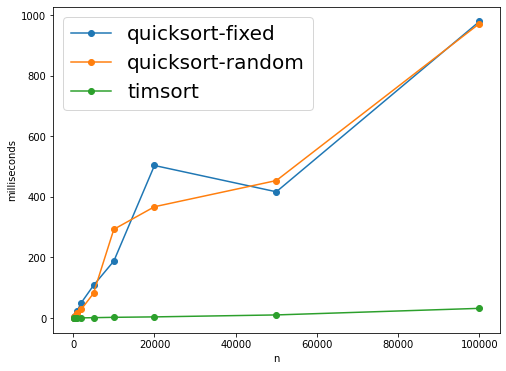

In [ ]:
import random, time
import tabulate
from functools import reduce


def select_random(a):
    return random.choice(a)

def select_first(a):
    return a[0]


def qsort(a, pivot_fn):
    ## To Do
    if len(a) <= 1:
        return a
    else:
        p = pivot_fn(a)
        l = list(filter(lambda x: x < p, a))
        r = list(filter(lambda x: x > p, a))
        c = list(filter(lambda x: x==p, a))
        return qsort(l, pivot_fn) + c + qsort(r, pivot_fn)

def time_search(sort_fn, mylist):
    """
    Return the number of milliseconds to run this
    search function on this list.

    Note 1: `sort_fn` parameter is a function.
    Note 2: time.time() returns the current time in seconds.
    You'll have to multiple by 1000 to get milliseconds.

    Params:
      sort_fn.....the search function
      mylist......the list to search
      key.........the search key

    Returns:
      the number of milliseconds it takes to run this
      search function on this input.
    """
    start = time.time()
    sort_fn(mylist)
    return (time.time() - start) * 1000
    ###

def compare_sort(sizes=[100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]):
    """
    Compare the running time of linear_search and binary_search
    for input sizes as given. The key for each search should be
    -1. The list to search for each size contains the numbers from 0 to n-1,
    sorted in ascending order.

    You'll use the time_search function to time each call.

    Returns:
      A list of tuples of the form
      (n, linear_search_time, binary_search_time)
      indicating the number of milliseconds it takes
      for each method to run on each value of n
    """
    ### TODO
    quicksort_fixed_pivot = lambda a: qsort(a, select_first)
    quicksort_random_pivot = lambda a: qsort(a, select_random)
    tim_sort = sorted
    result = []
    for size in sizes:
        mylist = list(range(int(size)))
        random.shuffle(mylist)
        result.append([
            len(mylist),
            #time_search(selection_sort, mylist),
            time_search(quicksort_fixed_pivot, mylist),
            time_search(quicksort_random_pivot, mylist),
            time_search(tim_sort, mylist)
        ])
    return result
    ###

def print_results(results):
    """ done """
    print(tabulate.tabulate(results,
                            headers=['n', 'quicksort fixed pivot', 'quicksort random pivot', 'tim-sort'],
                            floatfmt=".3f",
                            tablefmt="github"))


def plot_results(results):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,6))
    plt.plot([i[0] for i in results], [i[1] for i in results], 'o-', label='quicksort-fixed')
    plt.plot([i[0] for i in results], [i[2] for i in results], 'o-', label='quicksort-random')
    plt.plot([i[0] for i in results], [i[3] for i in results], 'o-', label='timsort')
    plt.xlabel('n')
    plt.ylabel('milliseconds')
    plt.legend(fontsize=20)
    plt.savefig('results.pdf')



def test_print():
    results = compare_sort()
    print_results(results)
    plot_results(results)

random.seed()
test_print()